# Data Analytics - Preprocessing

# Pair 2 - BEML and ESCORTS

---

# 1. Importing required modules

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

---

# 2. Get the dataset from pairs data

In [2]:
pair_df = pd.read_csv("../../Storage/pairs_data/BEML-ESCORTS-0.csv")
pair_df.head()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore
0,2018-08-06,909.099976,880.049988,29.049988,1.821236
1,2018-08-07,868.599976,873.700012,-5.100037,0.672698
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785
3,2018-08-09,810.150024,878.750000,-68.599976,-1.462939
4,2018-08-10,807.750000,865.250000,-57.500000,-1.089624


In [3]:
pair_df.describe()

,BEML_Close,ESCORTS_Close,Spread,zscore
count,59.000000,59.000000,59.000000,5.900000e+01
mean,703.261019,728.362711,-25.101692,-1.016136e-16
std,109.381402,123.597491,29.988712,1.008584e+00
min,528.650024,556.299988,-81.849976,-1.908565e+00
25%,587.899994,608.074982,-46.699982,-7.263962e-01
50%,737.900024,725.450012,-19.500000,1.883967e-01
75%,807.600006,869.399994,-6.000000,6.424303e-01
max,909.099976,899.549988,29.049988,1.821236e+00


---

# 3. Calculation of correlation and co-integration

## 3.1. Calculation of correlation between the 2 stocks' closing prices

In [4]:
corr_df = pair_df[["BEML_Close", "ESCORTS_Close"]]
corr_df.head()

,BEML_Close,ESCORTS_Close
0,909.099976,880.049988
1,868.599976,873.700012
2,825.150024,876.500000
3,810.150024,878.750000
4,807.750000,865.250000


In [5]:
corr = corr_df.corr()
corr.style.background_gradient()

,BEML_Close,ESCORTS_Close
BEML_Close,1.000000,0.974214
ESCORTS_Close,0.974214,1.000000


- We can see that the closing prices of the 2 stocks are highly correlated

## 3.2. Calculation of p-value to see if the stocks are co-integrated

In [6]:
score, pvalue, _ = coint(pair_df["BEML_Close"], pair_df["ESCORTS_Close"])
pvalue

0.0036844568740401784

- We also find that with a p-value < 0.05, the correlation is statistically significant

## 3.3. Visualization of the pair

Text(0, 0.5, 'Price')

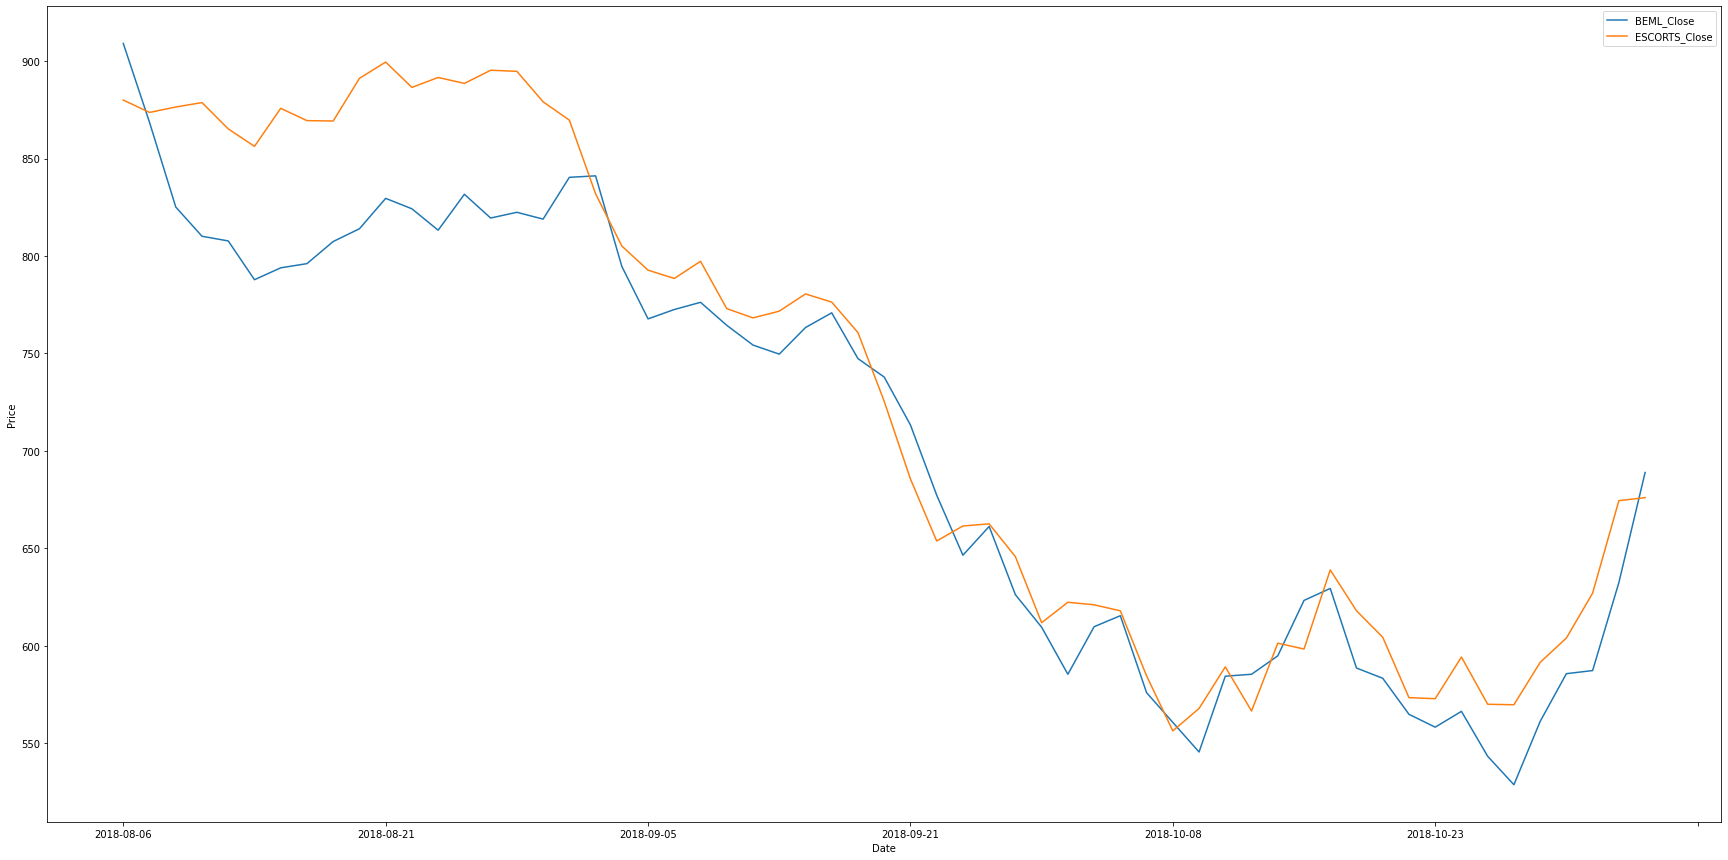

In [7]:
pair_price_plt = pair_df.plot(x='Date', y=['BEML_Close', 'ESCORTS_Close'], figsize=(30,15))
pair_price_plt.set_xlabel("Date")
pair_price_plt.set_ylabel("Price")

- We can see that even visually, the stocks are moving in tandem
- This further confirms the validity of the stock pair

---

# 4. Understanding the Spread between the stock pair

## 4.1. Visualizing the spread between the stock pair

Text(0, 0.5, 'Price')

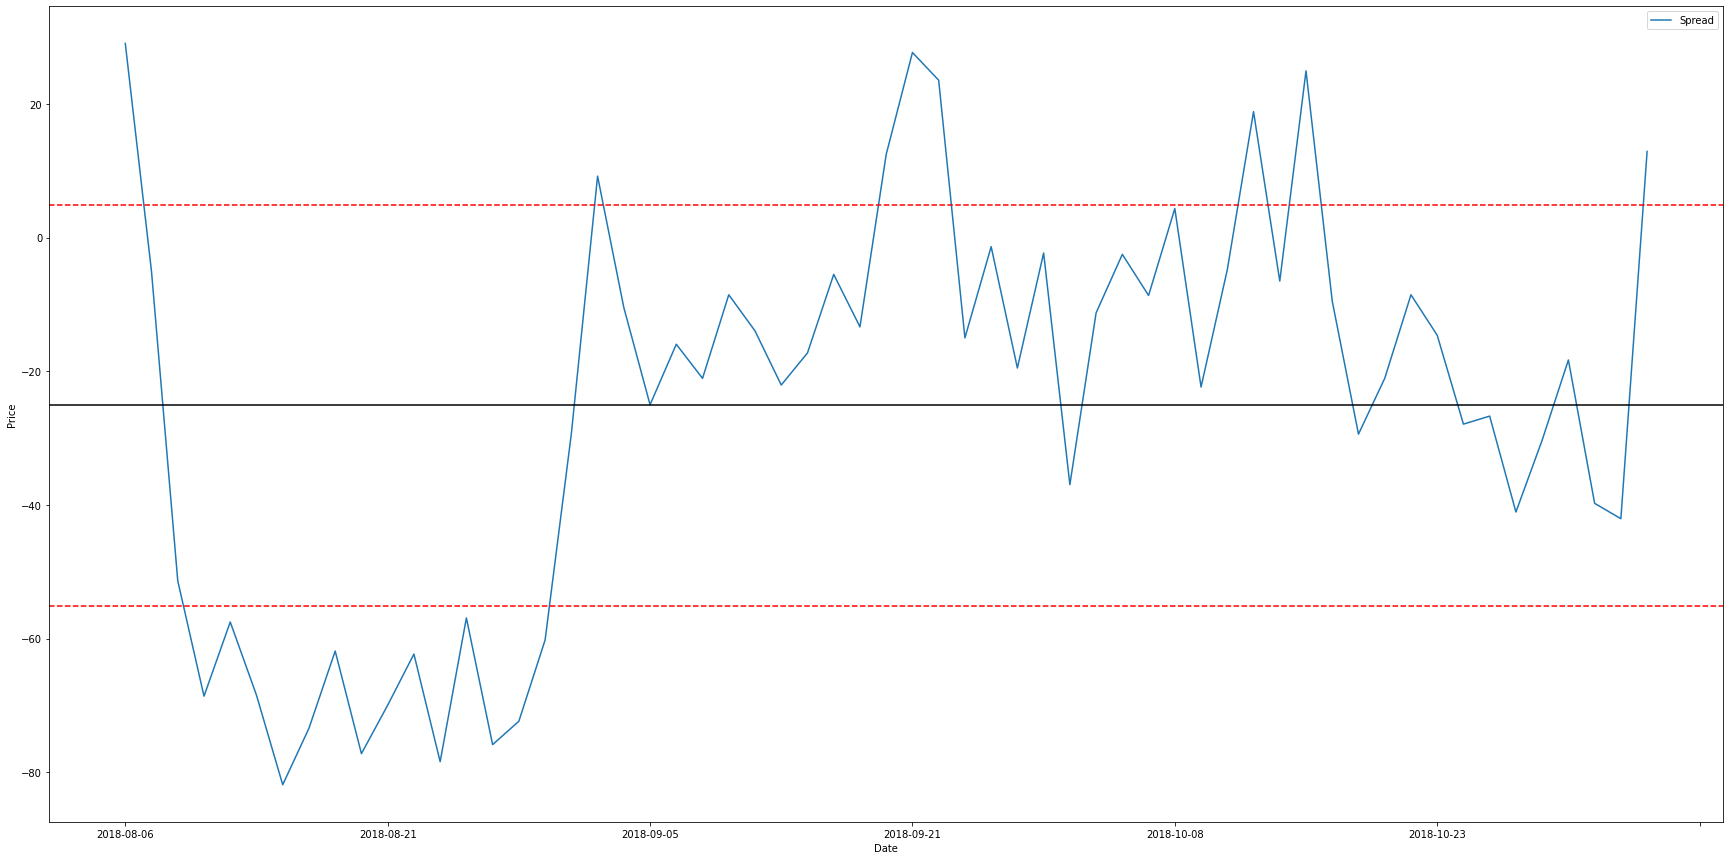

In [8]:
pair_spread_mean = pair_df['Spread'].mean()
spread_std = pair_df['Spread'].std()

pair_spread_plt = pair_df.plot(x='Date', y=['Spread'], figsize=(30,15))

pair_spread_plt.axhline(pair_spread_mean, c='black')
pair_spread_plt.axhline(pair_spread_mean + spread_std, c='red', ls = "--")
pair_spread_plt.axhline(pair_spread_mean - spread_std, c='red', ls = "--")

pair_spread_plt.set_ylabel("Price")

__In the graph above:__
- The blue line is the spread
- The Black line is mean price
- The Red dotted lines represent 1 and 2 standard deviations above and below the mean respectively


## 4.2. Visualizing the zscore of spread between the stock pairs

Text(17.200000000000017, 0.5, 'zscore')

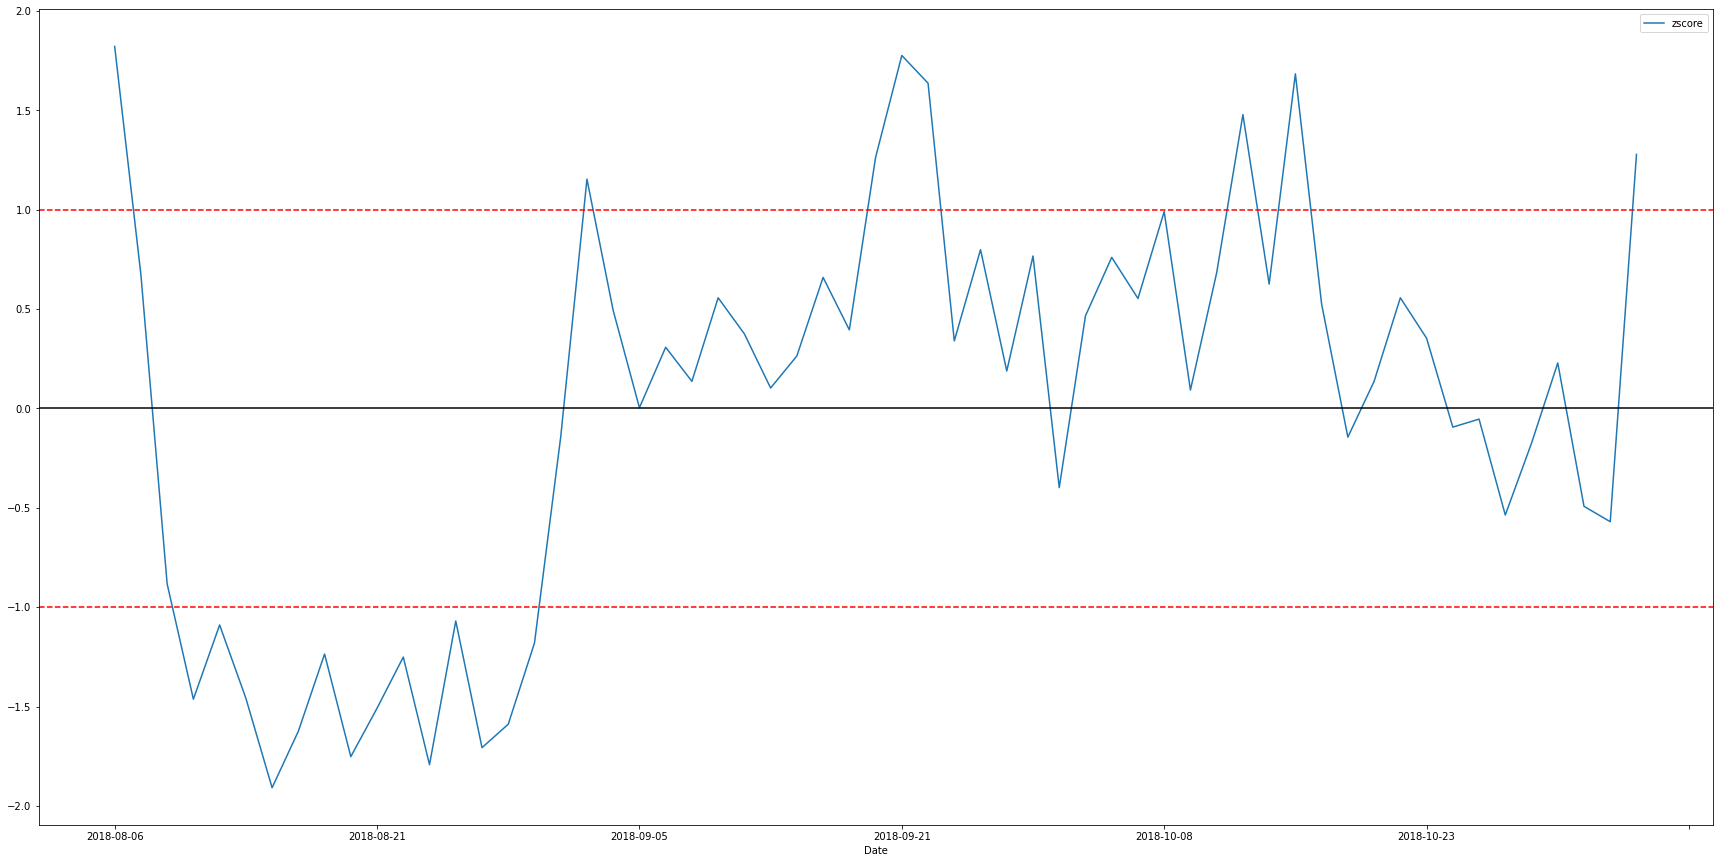

In [9]:
pair_zscore_plt = pair_df.plot(x='Date', y='zscore', figsize=(30,15))

pair_zscore_plt.axhline(0, c='black')
pair_zscore_plt.axhline(1, c='red', ls = "--")
pair_zscore_plt.axhline(-1, c='red', ls = "--")

pair_spread_plt.set_ylabel("zscore")

__In the graph above:__
- The blue line is the zscore of the spread
- The Black line is at 0
- The Red dotted lines represent 1 and -1 respectively

---


# 5. Generating orders on the pair

## 5.1. Function definition and parameters for orders generation

In [10]:
# long positions
# short positions
# flat positions
# Get out of a position

def generate_orders(prices):
    
    orders = []
    
    position = "FLAT"
    
    # Keep track of last price
    # prev_price = None
    
    for price in prices:
        
        # Get out of a LONG position
        if position == "LONG" and (price == 0 or price > 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"
            
        # Get out of a SHORT position
        elif position == "SHORT" and (price == 0 or price < 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"

        # Get into a long position
        elif price < -1.5:
            position = "LONG"
            orders.append("LONG")

        # Get into a long position
        elif price > 1.5:
            position = "SHORT"
            orders.append("SHORT")

        # Default if no other order is placed
        else:
            orders.append("FLAT")

    return orders


## 5.2. Making a copy of the dataframe to add orders

In [11]:
pair_orders_df = pair_df.copy()
pair_orders_df.head()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore
0,2018-08-06,909.099976,880.049988,29.049988,1.821236
1,2018-08-07,868.599976,873.700012,-5.100037,0.672698
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785
3,2018-08-09,810.150024,878.750000,-68.599976,-1.462939
4,2018-08-10,807.750000,865.250000,-57.500000,-1.089624


## 5.3. Generating orders on the pair

In [12]:
pair_orders_df["Orders"] = generate_orders(pair_df["zscore"])
pair_orders_df.head()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
1,2018-08-07,868.599976,873.700012,-5.100037,0.672698,FLAT
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
3,2018-08-09,810.150024,878.750000,-68.599976,-1.462939,FLAT
4,2018-08-10,807.750000,865.250000,-57.500000,-1.089624,FLAT


__In the orders above__:
- *LONG* - denotes that a LONG position be taken on HEROMOTOCO and simultaneously a SHORT position be taken on BAJAJ-AUTO on the closing price of that date.
- *SHORT* - denotes that a SHORT position be taken on HEROMOTOCO and simultaneously a LONG position be taken on BAJAJ-AUTO on the closing price of that date.
- *FLAT* - denotes no order to be placed on that day.
- *GET_OUT_OF_POSTION* - denotes to cash in on all previous orders on that date and have no out standing LONG or SHORT positions as of that date.

## 5.4 Display all orders which are not *FLAT*

In [13]:
pair_orders_df[pair_orders_df['Orders'] != "FLAT"]

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
6,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
7,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
9,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
10,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
12,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
14,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
15,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG
18,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


## 5.5. Visualize the orders placed

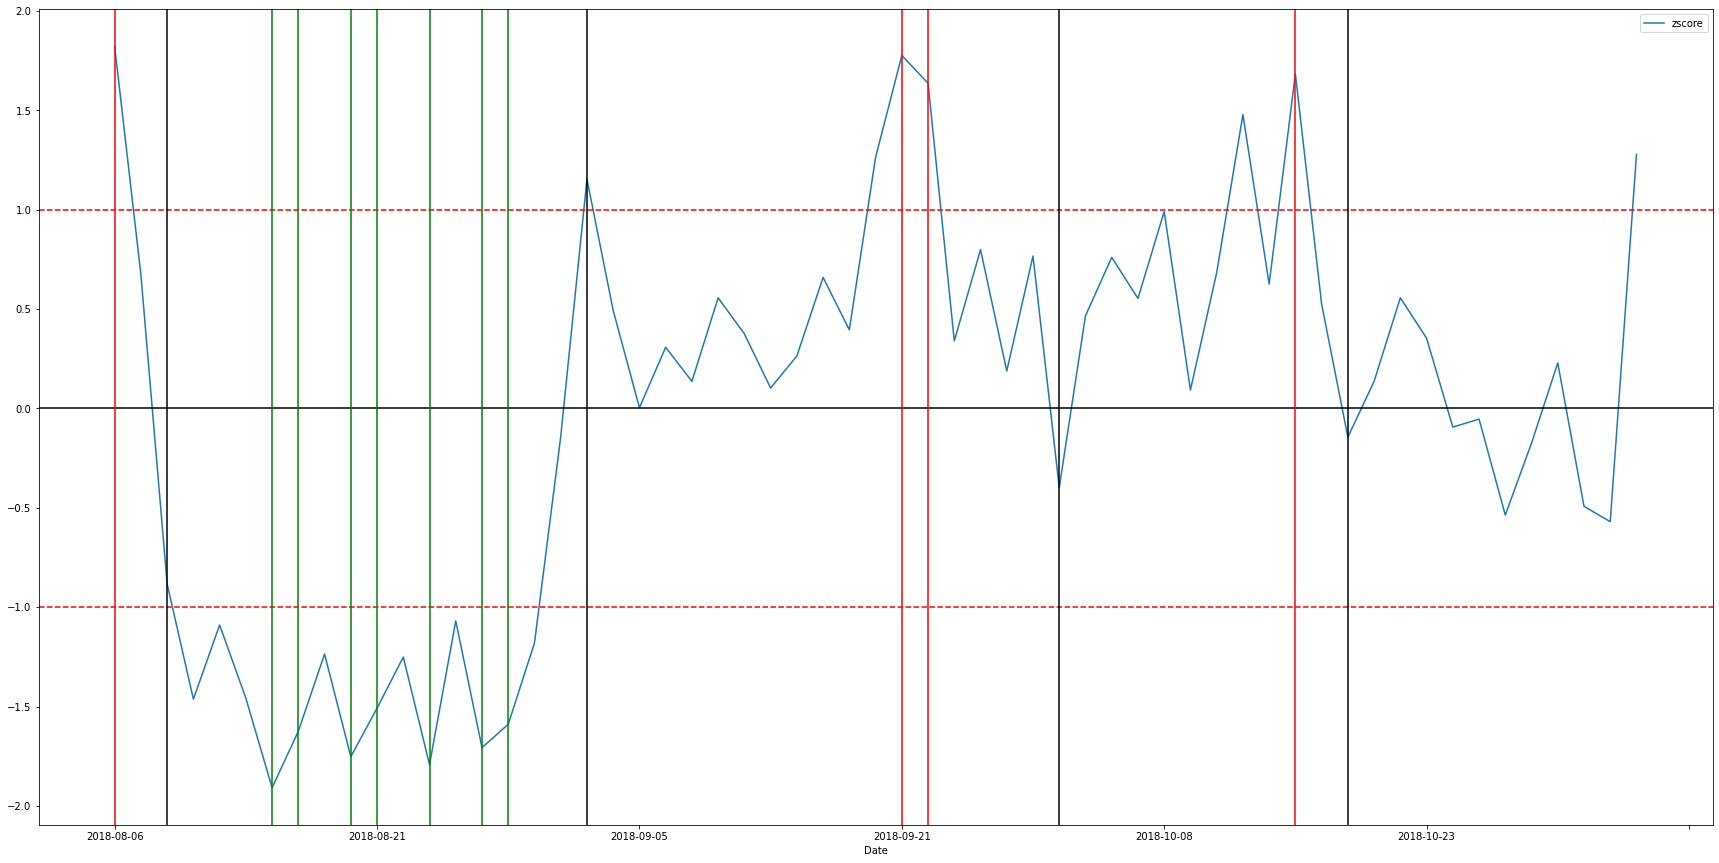

In [14]:
# Plotting the zscore of the Spread of 20 day Simple Moving Average
orders_plt = pair_orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = pair_orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")


__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 5.6 Put the orders into a csv

In [15]:
pair_orders_df = pair_orders_df.set_index('Date')
pair_orders_df.to_csv('Pair2_orders.csv')